## Decision Tree Implementation
We'll be implementing the Decision tree algorithm to predict Diabetes

FYI: Post pruning is carried out on a smaller dataset, while Pre-pruning on a larger one

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Rig\\Work\\ML ig\\Datasets\\diabetes.csv")

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
44,7,159,64,0,0,27.4,0.294,40,0
308,0,128,68,19,180,30.5,1.391,25,1
387,8,105,100,36,0,43.3,0.239,45,1
259,11,155,76,28,150,33.3,1.353,51,1
28,13,145,82,19,110,22.2,0.245,57,0


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

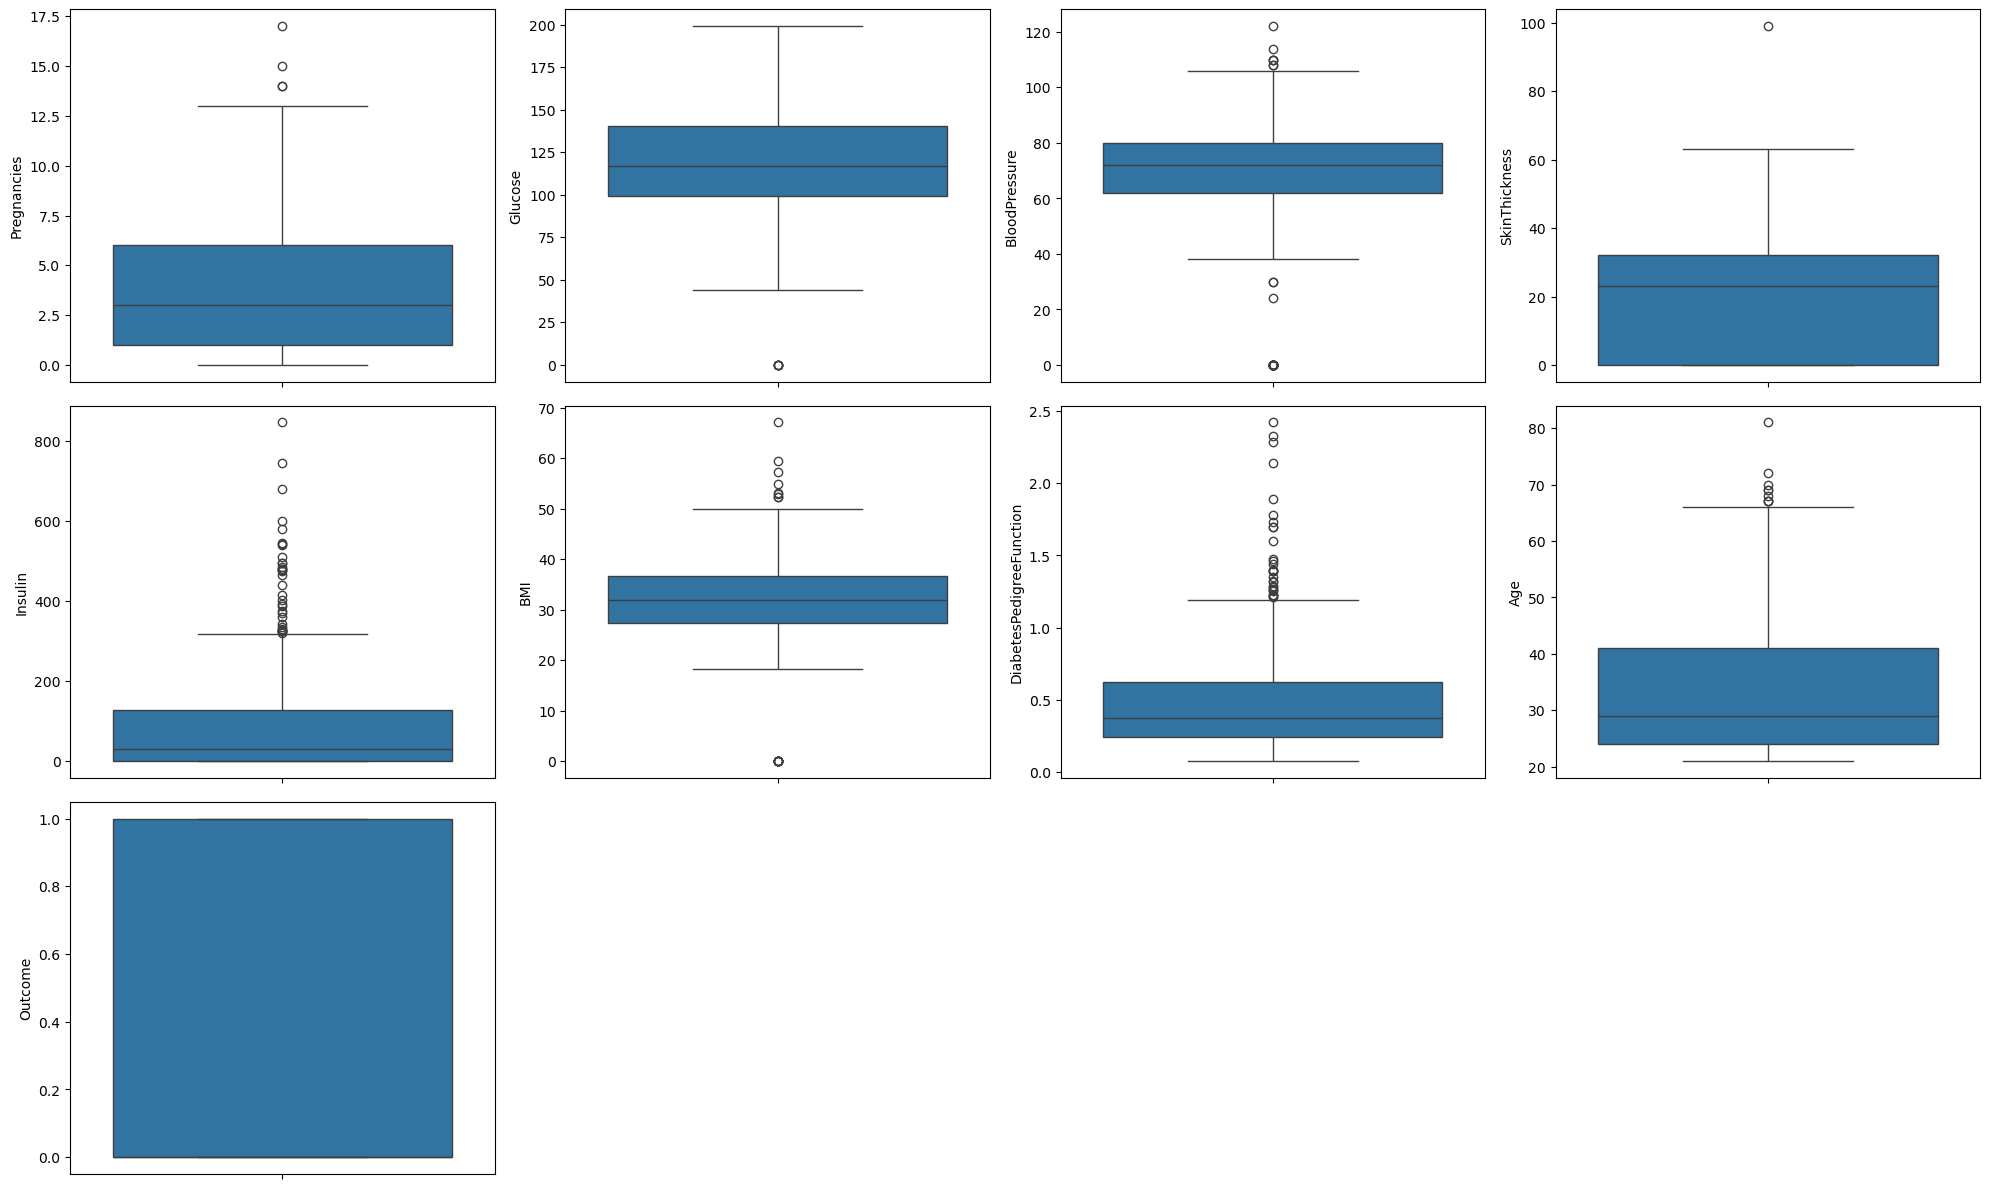

In [13]:
                     #The sizes can be customised. No need to make this part tough
i=1
n_cols = 4           # This is done for numeric columns. Here,all are numeric
n_rows = (len(df.columns) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for feature in df.columns:
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y = df[feature])
    i+=1
plt.tight_layout()
plt.show()

Removing the outliers:

In [15]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    low = q1 - 1.5 * IQR
    up = q3 + 1.5 * IQR
    df = df[(df[col] > low) & (df[col]< up)]

In [ ]:
# Or, use .clip funtion. It makes all the outlier values equal to lower/upper bound. No data loss, but data changed. 
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    low = q1 - 1.5 * IQR
    up = q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=low, upper=up) 

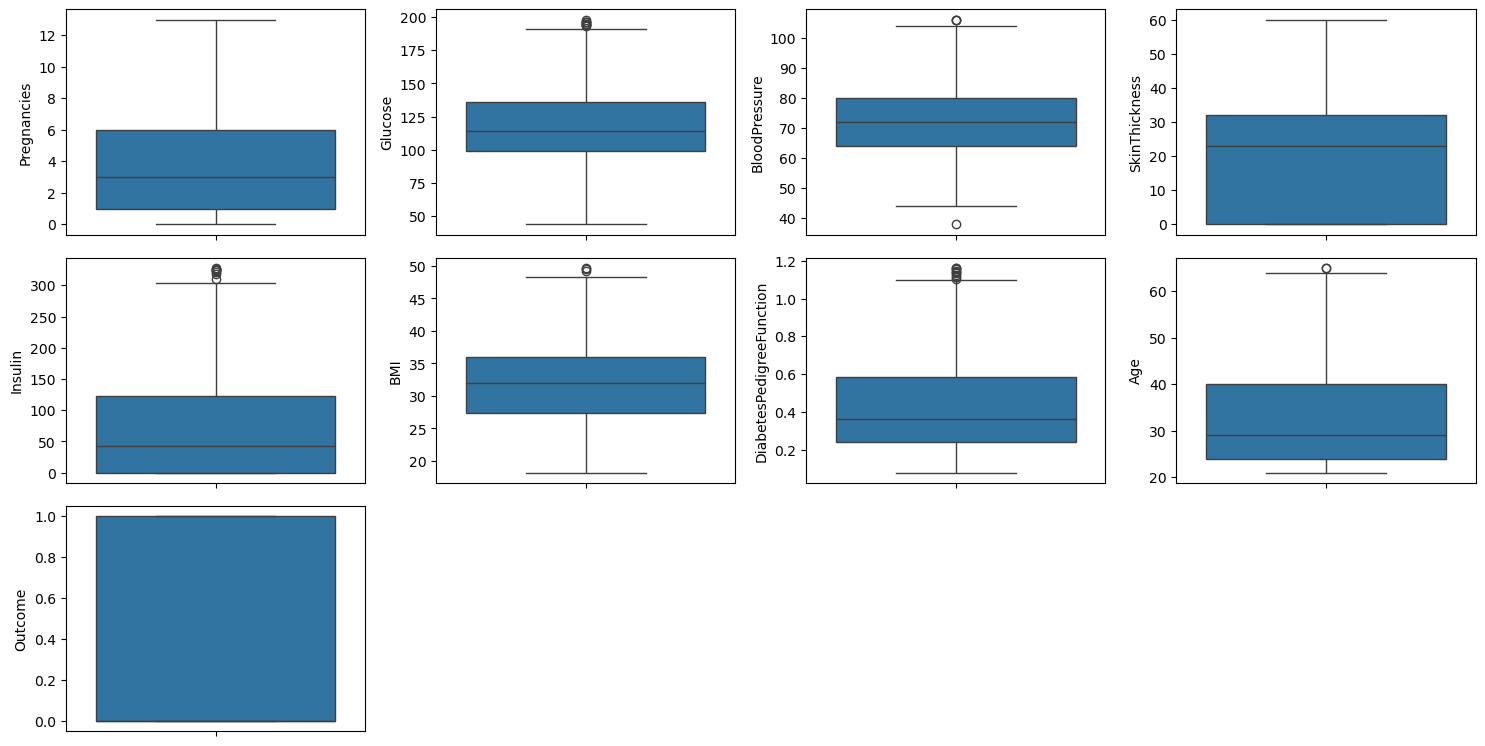

In [17]:
i=1
n_cols = 4           # This is done for numeric columns. Here,all
n_rows = (len(df.columns) + n_cols - 1) // n_cols
plt.figure(figsize=(15,10))
for feature in df.columns:
    plt.subplot( 4, 4, i)
    sns.boxplot(y = df[feature])
    i+=1
plt.tight_layout()
plt.show()

In [18]:
df.shape

(636, 9)

In [19]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=6) #to prevent Over-fitting; POST-PRUNING

In [42]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

[Text(0.6851415094339622, 0.9285714285714286, 'x[1] <= 1.219\ngini = 0.441\nsamples = 508\nvalue = [341, 167]'),
 Text(0.4080188679245283, 0.7857142857142857, 'x[1] <= -0.165\ngini = 0.369\nsamples = 439\nvalue = [332, 107]'),
 Text(0.21226415094339623, 0.6428571428571429, 'x[0] <= 0.867\ngini = 0.235\nsamples = 257\nvalue = [222, 35]'),
 Text(0.10377358490566038, 0.5, 'x[5] <= -0.233\ngini = 0.174\nsamples = 218\nvalue = [197, 21]'),
 Text(0.05660377358490566, 0.35714285714285715, 'x[7] <= 2.493\ngini = 0.051\nsamples = 114\nvalue = [111, 3]'),
 Text(0.03773584905660377, 0.21428571428571427, 'x[6] <= 0.988\ngini = 0.035\nsamples = 113\nvalue = [111, 2]'),
 Text(0.018867924528301886, 0.07142857142857142, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.05660377358490566, 0.07142857142857142, 'gini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.07547169811320754, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1509433962264151, 0.35714285714285715, 'x[1]

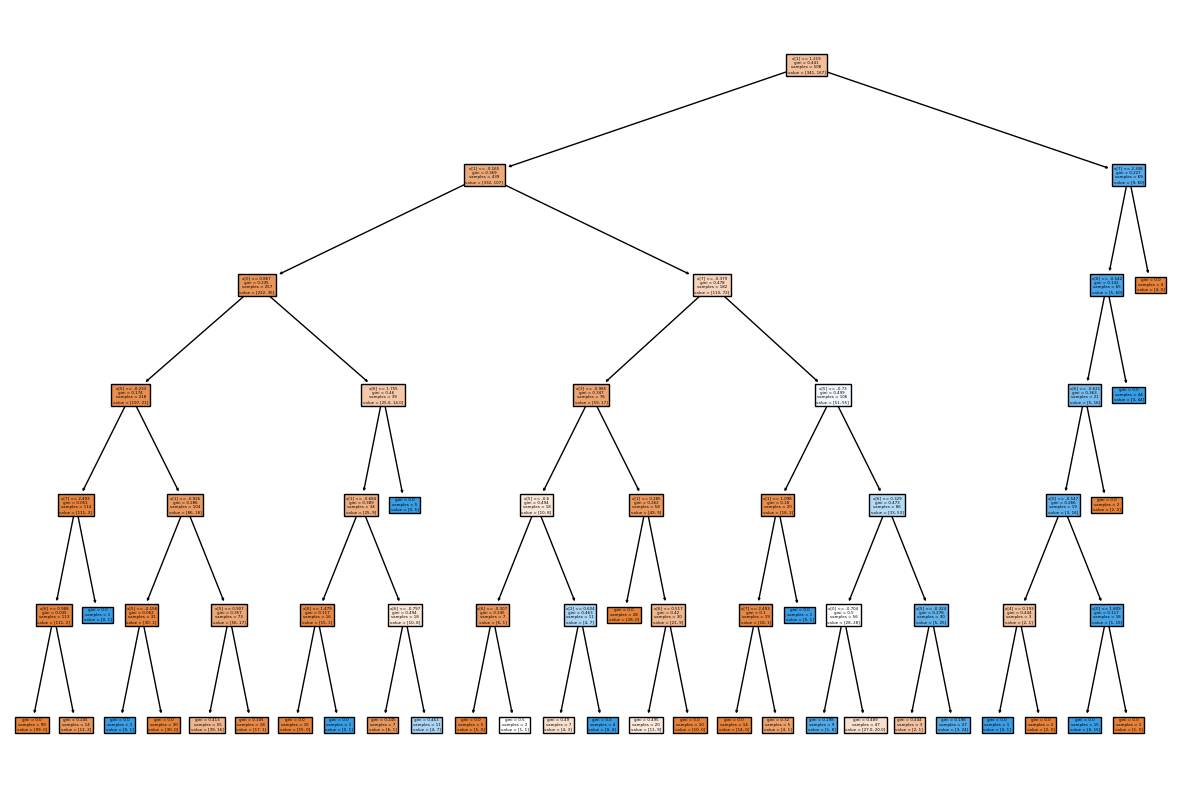

In [44]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(tree_model, filled=True)

In [46]:
y_pred = tree_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.8125


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        97
           1       0.64      0.52      0.57        31

    accuracy                           0.81       128
   macro avg       0.75      0.71      0.73       128
weighted avg       0.80      0.81      0.81       128

